# Peculiar Velocity Calculations

Check calculations of peculiar velocities in the EDR set using the Fundamental Plane and Tully Fisher samples.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.constants import c as c
from astropy.table import Table
from astropy.coordinates import SkyCoord

In [2]:
mpl.rc('font', size=14)

## Fundamental Plane

Fundamental plane sample from Khaled. The `pv` column contains the peculiar velocities.

In [4]:
fpedr = Table.read('../../SV/DESI_FP_logdists_fiducial.csv', format='ascii.commented_header')
fpedr

fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,z_x,zerr,zwarn,spectype,subtype,deltachi2,healpix_id,targetid.2,target_ra,target_dec,obsconditions,release,brickid_1,brick_objid,fiberflux_ivar_g,fiberflux_ivar_r,fiberflux_ivar_z,morphtype,flux_g,flux_r,flux_z,flux_ivar_g,flux_ivar_r,flux_ivar_z,ebv,flux_w1,flux_w2,flux_ivar_w1,flux_ivar_w2,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,sersic_1,coadd_numexp,coadd_exptime,coadd_numnight,coadd_numtile,healpix_id.1,objid_1,brickid.1,brickname_1,ra.1,dec.1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,OBJID_2,BRICKID_2,BRICKNAME_2,RA_2,DEC_2,TYPE,SERSIC_2,Z_PHOT_MEDIAN,Z_PHOT_L95,mag_g,mag_r,mag_z,mag_B,mag_g_err,mag_r_err,mag_z_err,fibre_mag_g,fibre_mag_r,fibre_mag_z,uncor_radius,BA_ratio,circ_radius,uncor_radius_err,err_shape_e1,err_shape_e2,pos_angle,Separation,mag_r_corrected,BA_ratio_error,TargetId,tmass,flag,z_y,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy,zcmb,zcmb_group,dz,dz_group,r,er,kcor_r,kcor_g,i,ei,s,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr
int64,int64,float64,float64,int64,int64,int64,str3,str6,int64,float64,float64,int64,str6,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,str5,int64,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,str8,float64,float64,float64,float64,float64,float64,int64,int64,str8,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str22,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39628417112478213,400,192.260476663904,26.8931119632851,39628417112478213,1301,28148,sv1,bright,39628417112478213,0.0246198717561043,3.05679754892841e-06,0,GALAXY,--,208858.610858595,1301,39628417112478213,192.260476663904,26.8931119632851,4,9010,481140,4613,False,--,--,SER,718.737670898438,1493.39233398438,2632.02905273438,12.3129425048828,3.62823224067688,2.14227867126465,0.0110182352364063,1792.16967773438,1005.01934814453,-1.0,-1.0,84.9578857421875,176.525405883789,311.1171875,84.9578857421875,176.525405883789,311.1171875,3.24683547019958,15,6695.12646484375,7,1,1301,4613,481140,1921p270,192.260476663904,26.8931119632851,138.97191401554343,1.3838325204676758,50.32823792570804,37.09863394208711,4613,481140,1921p270,192.26047666390429,26.89311196328508,SER,3.2468355,0.023591544,0.018623924,15.323162,14.54071,13.93593,15.744,0.00041668504,0.00037338858,0.00027839307,17.641579,16.859127,16.254347,5.18443,0.3502856,3.068401,0.001138905,0.00015687887,0.00016151024,-22.695267,9.032862052074111e-10,14.54071,0.0001115389190186,39628417112478213,2MASXJ12490248+2653350,1,0.0246,14.367,0.643,0.902,0.145,0.216,0.02556977744883837,0.02556977744883837,76.1982724818877,76.1982724818877,0.04386937487526493,0.00011782648155669783,0.02503684213839932,0.04334819959542904,2.9441341941217747,0.0002789970682498833,2.154576602686897,0.004324548825517668,-19.92513203057605,1.0,0.04082911658524023,0.10087512604970075,-0.21153047623097235,716.01186967735,1769.0264607119864
39628417133447721,426,193.57922538261,27.0680307191934,39628417133447721,1304,28149,sv1,bright,39628417133447721,0.0278119786253126,2.6882528734125e-06,0,GALAXY,--,648939.39017427,1304,39628417133447721,193.57922538261,27.0680307191934,4,9010,481145,2601,--,--,--,SER,5968.87890625,12903.7099609375,23318.6015625,1.23958659172058,0.327169686555862,0.208652123808861,0.008288275450468,16008.04296875,9302.5791015625,-1.0,-1.0,225.581344604492,487.668823242188,881.277954101562,225.581451416016,487.669097900391,881.278625488281,4.501549243927,15,6695.12646484375,

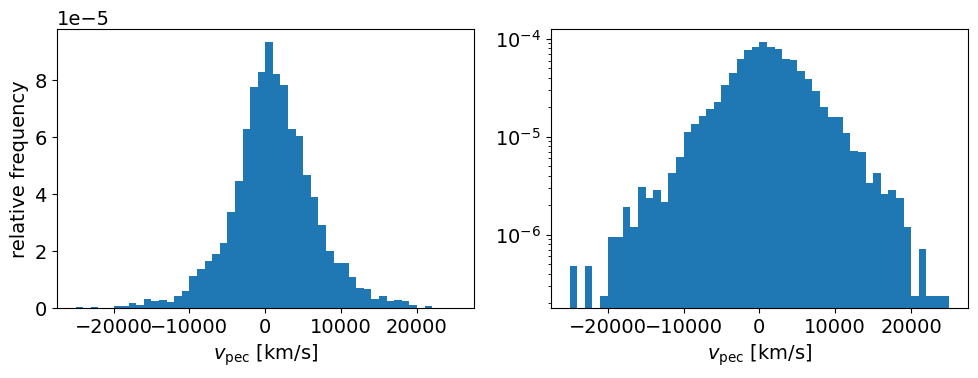

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)

ax = axes[0]
ax.hist(fpedr['pv'], bins=np.arange(-25000, 26000, 1000), density=True)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       ylabel='relative frequency')

ax = axes[1]
ax.hist(fpedr['pv'], bins=np.arange(-25000, 26000, 1000), density=True)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       yscale='log');

## CosmicFlows-4 Objects

Read in the CosmicFlows-4 table so that we can use it to identify Coma galaxies later on.

In [7]:
cosmicflows = Table.read('../Tully15-Table3.fits')
cosmicflows

f_Nest,Nest,Nmb,PGC1,SGLON,SGLAT,logLK,<Vcmba>,DM,sigV,R2t,sigP,Mlum,CF
,,,,deg,deg,[Lsun],km / s,mag,km / s,Mpc,km / s,Msun,
int16,int32,int16,int32,float64,float64,float64,int32,float64,int16,float64,int16,float64,float64
1,100001,136,44715,89.6226,8.1461,13.15,7331,34.33,886,2.129,1045,1.710e+15,1.65
1,100002,197,41220,103.0008,-2.3248,12.69,1491,30.87,670,1.440,707,5.290e+14,1.00
1,100003,113,43296,156.2336,-11.5868,12.75,3873,32.94,822,1.520,746,6.230e+14,1.12
1,100004,81,58265,71.5103,49.7851,13.16,9424,34.87,740,2.153,1057,1.770e+15,2.26
1,100005,61,36487,92.0255,-10.4950,12.78,6987,34.22,707,1.560,766,6.730e+14,1.58
1,100006,85,31478,139.4478,-37.6063,12.48,4099,33.06,648,1.198,588,3.050e+14,1.14
1,100007,86,56962,108.5182,49.0878,13.52,11603,35.32,1261,2.821,1385,3.980e+15,3.30
1,100008,65,39600,67.2953,3.2390,11.94,1054,30.11,209,0.745,366,7.330e+13,1.00


### Coma Cuts

Set up selection for membership in Coma.

In [8]:
Coma_nest = 100001

Coma_row_t3 = cosmicflows['Nest'] == Coma_nest

R2t_Coma = cosmicflows['R2t'][Coma_row_t3][0]
sigma_Coma = cosmicflows['sigP'][Coma_row_t3][0]
mu_Coma = cosmicflows['DM'][Coma_row_t3][0]

coma_coords = SkyCoord(cosmicflows['SGLON'][Coma_row_t3], cosmicflows['SGLAT'][Coma_row_t3], frame='supergalactic')
coma_coords

<SkyCoord (Supergalactic): (sgl, sgb) in deg
    [(89.6226, 8.1461)]>

In [9]:
d_Coma = 10*10**(0.2*mu_Coma) # pc
V_Coma = 100*(d_Coma*1e-6)    # km/s

### Calculate the Projected Distance between Coma and Each Galaxy

In [10]:
# First, we need to convert R2t from Mpc to an angle, using the group's velocity
# Note that we are NOT assuming that the size of the cluster is a small angle!!
R2t_Coma_angle_1p5 = np.arctan(1.5*R2t_Coma/(d_Coma*1e-6))*u.radian
R2t_Coma_angle_3 = np.arctan(3*R2t_Coma/(d_Coma*1e-6))*u.radian

In [11]:
fp_coords = SkyCoord(fpedr['ra_1'], fpedr['dec_1'], unit='deg')
sep = coma_coords.separation(fp_coords)

In [12]:
ckms = c.to_value('km/s')
ckms

299792.458

In [13]:
in_Coma1 = (sep < R2t_Coma_angle_1p5) & (fpedr['z_x']*ckms > V_Coma - 3*sigma_Coma) & (fpedr['z_x']*ckms < V_Coma + 3*sigma_Coma)
in_Coma2 = (sep >= R2t_Coma_angle_1p5) & (sep < R2t_Coma_angle_3) & (fpedr['z_x']*ckms > V_Coma - 2*sigma_Coma) & (fpedr['z_x']*ckms < V_Coma + 2*sigma_Coma)
in_Coma =in_Coma1 | in_Coma2

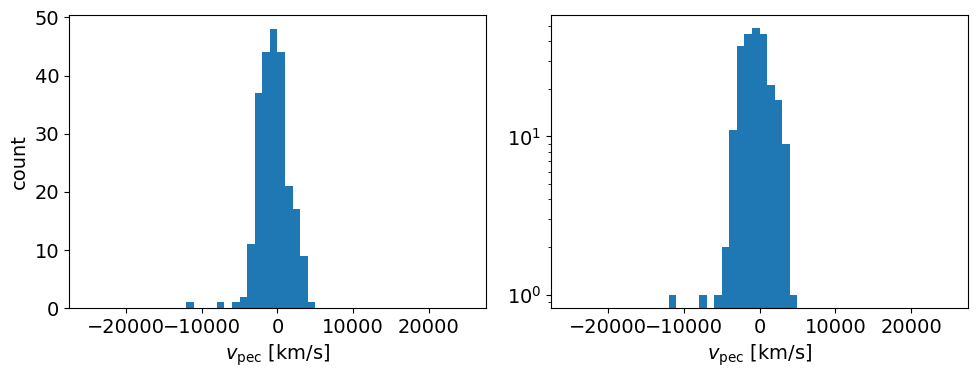

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)

ax = axes[0]
ax.hist(fpedr['pv'][in_Coma], bins=np.arange(-25000, 26000, 1000))
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       ylabel='count')

ax = axes[1]
ax.hist(fpedr['pv'][in_Coma], bins=np.arange(-25000, 26000, 1000))
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       yscale='log');

## Tully-Fisher Sample

TF data from Kelly plus peculiar velocities.

In [15]:
tfedr = Table.read('SGA_fuji_jointTFR-varyV0-perpdwarf_moduli_pec-Watkins15.fits')
tfedr

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p33R26,V_0p33R26_err,TARGETID,PHOTSYS,R_MAG_SB26_CORR,R_MAG_SB26_ERR_CORR,R_ABSMAG_SB26,R_ABSMAG_SB26_err,R_ABSMAG_SB26_CORR,R_ABSMAG_SB26_CORR_err,R_ABSMAG_SB26_TFbright,R_ABSMAG_SB26_TFbright_err,mu_TFbright,mu_TFbright_err,V_PEC,VERR_PEC
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,int64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
896,SGA-2020 896,PGC1190469,1190469,180.38184750000002,1.2958311000000002,Sc,76.42,0.44771332,0.7726806,0.022478215,23.47448,16.591,False,LEDA-20181114,256,PGC1190469,1,True,180.38184750000002,1.2958311000000002,0.44771332,1803p012,180.38182702766252,1.2958268307578154,0.6239483,SB26,76.93204,0.79918337,180.38178401011206,1.295990493861164,16.25661,7.6343946,7.3312407,7.215459,4.267071,6.71145,8.98399,11.085844,12.783826,14.283976,15.799797,17.191736,18.718449,18.022089,17.380363,16.982048,17.370085,16.760023,16.377943,16.967363,16.3918,16.024693,16.728146,16.17214,15.817478,16.609686,16.06539,15.715597,16.54587,16.008068,15.658699,16.505327,15.967604,15.619181,16.48057,15.942226,15.594475,16.459711,15.924162,15.572447,0.02403138,0.037713606,0.06752815,0.0597593,0.041663416,0.057950046,0.06897008,0.07238169,0.11818266,0.0070740557,0.008179923,0.008415725,0.005835994,0.006626628,0.0068130954,0.0056522293,0.006152283,0.0062183426,0.0057331356,0.0059468574,0.0059097866,0.005547482,0.0057424223,0.005712396,0.005370375,0.0055686547,0.005550764,0.0052407323,0.0054267743,0.00542918

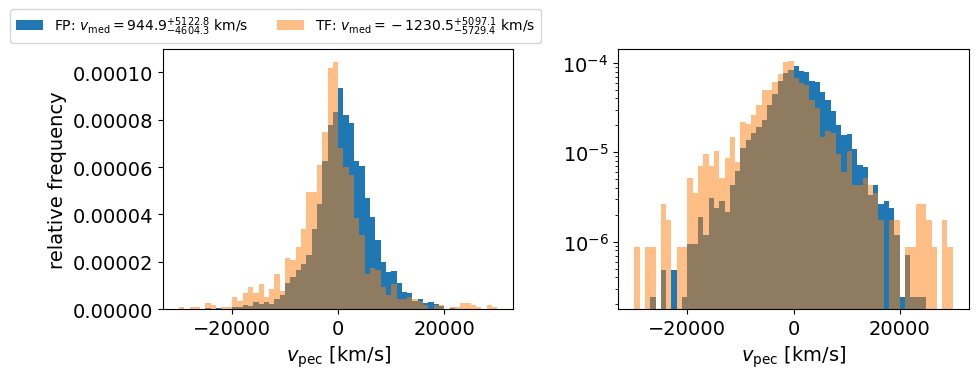

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)

vfp_stat = np.percentile(fpedr['pv'], [16, 50, 84])
vtf_stat = np.percentile(tfedr['V_PEC'], [16, 50, 84])

ax = axes[0]
ax.hist(fpedr['pv'], bins=np.arange(-30000, 31000, 1000), density=True, label=f'FP: $v_\mathrm{{med}}={vfp_stat[1]:5.1f}^{{+{(vfp_stat[2]-vfp_stat[1]):.1f}}}_{{-{(vfp_stat[1]-vfp_stat[0]):.1f}}}$ km/s')
ax.hist(tfedr['V_PEC'], bins=np.arange(-30000, 31000, 1000), density=True, label=f'TF: $v_\mathrm{{med}}={vtf_stat[1]:5.1f}^{{+{(vtf_stat[2]-vtf_stat[1]):.1f}}}_{{-{(vtf_stat[1]-vtf_stat[0]):.1f}}}$ km/s', alpha=0.5)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       ylabel='relative frequency')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 1.08, 1., .102), fontsize=10, ncol=2)

ax = axes[1]
ax.hist(fpedr['pv'], bins=np.arange(-30000, 31000, 1000), density=True)
ax.hist(tfedr['V_PEC'], bins=np.arange(-30000, 31000, 1000), density=True, label='TF', alpha=0.5)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       yscale='log');

# fig.savefig('SGA-edr-fullsample-tf-fp-checks.png', dpi=150)

In [17]:
tf_coords = SkyCoord(tfedr['RA'], tfedr['DEC'], unit='deg')

sep = coma_coords.separation(tf_coords)

tf_in_Coma1 = (sep < R2t_Coma_angle_1p5) & (tfedr['Z_DESI']*ckms > V_Coma - 3*sigma_Coma) & (tfedr['Z_DESI']*ckms < V_Coma + 3*sigma_Coma)
tf_in_Coma2 = (sep >= R2t_Coma_angle_1p5) & (sep < R2t_Coma_angle_3) & (tfedr['Z_DESI']*ckms > V_Coma - 2*sigma_Coma) & (tfedr['Z_DESI']*ckms < V_Coma + 2*sigma_Coma)
tf_in_Coma = tf_in_Coma1 | tf_in_Coma2

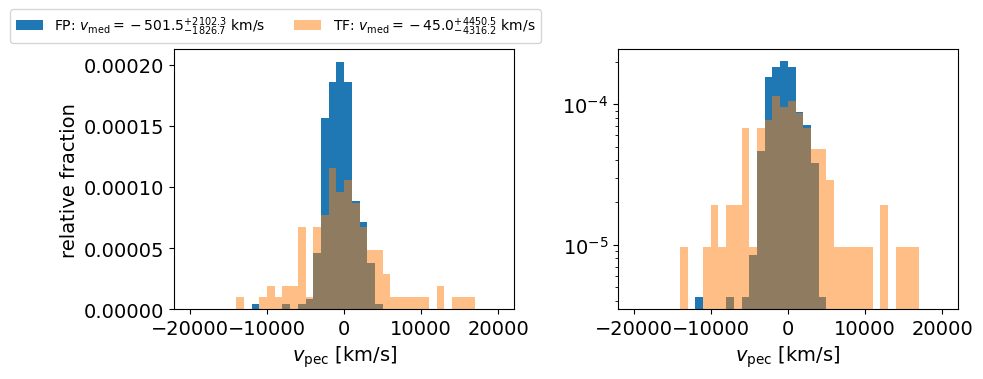

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, tight_layout=True)

vfp_stat = np.percentile(fpedr['pv'][in_Coma], [16, 50, 84])
vtf_stat = np.percentile(tfedr['V_PEC'][tf_in_Coma], [16, 50, 84])

ax = axes[0]
ax.hist(fpedr['pv'][in_Coma], bins=np.arange(-20000, 21000, 1000), density=True, label=f'FP: $v_\mathrm{{med}}={vfp_stat[1]:5.1f}^{{+{(vfp_stat[2]-vfp_stat[1]):.1f}}}_{{-{(vfp_stat[1]-vfp_stat[0]):.1f}}}$ km/s')
ax.hist(tfedr['V_PEC'][tf_in_Coma], bins=np.arange(-20000, 21000, 1000), density=True, label=f'TF: $v_\mathrm{{med}}={vtf_stat[1]:5.1f}^{{+{(vtf_stat[2]-vtf_stat[1]):.1f}}}_{{-{(vtf_stat[1]-vtf_stat[0]):.1f}}}$ km/s', alpha=0.5)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       ylabel='relative fraction')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 1.08, 1., .102), fontsize=10, ncol=2)

ax = axes[1]
ax.hist(fpedr['pv'][in_Coma], bins=np.arange(-20000, 21000, 1000), density=True)
ax.hist(tfedr['V_PEC'][tf_in_Coma], bins=np.arange(-20000, 21000, 1000), density=True, alpha=0.5)
ax.set(xlabel=r'$v_\mathrm{pec}$ [km/s]',
       yscale='log');

# fig.savefig('SGA-edr-coma-tf-fp-checks.png', dpi=150);